In [3]:
import numpy as np
import pandas as pd
count = 0
index = 0
data = np.asarray(pd.read_csv('data_train_edge.csv', header=None))
data2 = np.asarray(pd.read_csv('predict.csv', header=None))
data_real = np.delete(data,(0), axis = 0)
record  = np.zeros((20428,2), dtype=int)
print(len(data_real))


data2 = np.delete(data2,(0), axis = 0)
print(data2.shape)




print(data_real[20456][0])
for i in range (20457):
  if data_real[i][0] == data_real[i][1]:
    count = count + 1 
    #print(i)
    #data = np.delete(data,(i), axis = 0)
print(count)
print(data_real.shape)
for i in range (20456):
  if data_real[i][0] != data_real[i][1]:
    record[index] = data_real[i]
    index = index + 1 
    
print(index)
print(count)
print(record[:])
record = np.delete(record,(-1), axis = 0)
print("train set 排序:\n", record)


20457
(10200, 2)
1003
29
(20457, 2)
20427
29
[[   0   68]
 [   0  552]
 [   0   20]
 ...
 [1001  417]
 [1001  924]
 [   0    0]]
train set 排序:
 [[   0   68]
 [   0  552]
 [   0   20]
 ...
 [1001  420]
 [1001  417]
 [1001  924]]


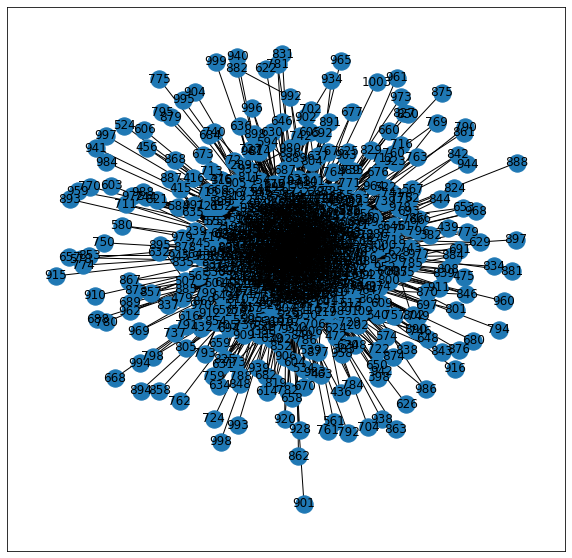

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edges_from(record)
  
plt.figure(figsize =(10, 10))
nx.draw_networkx(G, with_labels = True)

In [24]:
record_test = np.zeros((10200,2), dtype=int)
for i in range (len(data2)):
  record_test[i][0] = data2[i][0]
  record_test[i][1] = data2[i][1]
print(record_test[160:165])

[[  7 235]
 [  7   1]
 [  7 617]
 [  7 772]
 [  7  63]]


In [22]:
preds = nx.jaccard_coefficient(G)
for u, v, p in preds:
    print(f"({u}, {v}) -> {p:.8f}")

(7, 63) -> 0.13170732
(7, 587) -> 0.06315789
(7, 240) -> 0.04504505
(7, 96) -> 0.11794872
(7, 92) -> 0.07633588
(7, 334) -> 0.05825243
(7, 124) -> 0.09160305
(7, 358) -> 0.11510791
(7, 212) -> 0.09708738
(7, 760) -> 0.00000000
(7, 275) -> 0.06034483
(7, 129) -> 0.11894273
(8, 364) -> 0.04000000
(8, 671) -> 0.05555556
(8, 765) -> 0.03076923
(8, 611) -> 0.06666667
(8, 309) -> 0.08791209
(8, 855) -> 0.00000000
(8, 486) -> 0.05833333
(8, 852) -> 0.04000000
(9, 85) -> 0.02272727
(9, 297) -> 0.03030303
(9, 738) -> 0.06818182
(9, 823) -> 0.02777778
(9, 74) -> 0.08965517
(9, 440) -> 0.08333333
(9, 716) -> 0.00000000
(9, 814) -> 0.00000000
(10, 303) -> 0.10062893
(10, 375) -> 0.06400000
(10, 114) -> 0.12060302
(10, 64) -> 0.09090909
(10, 720) -> 0.04705882
(10, 270) -> 0.04285714
(10, 690) -> 0.07894737
(10, 131) -> 0.07964602
(10, 116) -> 0.08759124
(10, 547) -> 0.04494382
(10, 725) -> 0.01515152
(11, 60) -> 0.10344828
(11, 366) -> 0.08510638
(11, 183) -> 0.12648221
(11, 74) -> 0.08602151
(11,

KeyError: ignored

In [ ]:
label_2 = np.zeros(len(record), dtype=int)
#先把 record sorting

for i in range (len(record)):
  count_num = 0
  k = i + 1          
  for k in range (len(record)):
    if record[i][0] == record[k][0]:
      j = k + 1
      for j in range (len(record)):
        if record[j][0] == record[k][1]:
          if record[j][1] == record[i][1]:
            count_num = count_num + 1
        elif record[j][1] == record[k][1]:
          if record[j][0] == record[i][1]:
            count_num = count_num + 1
  label_2[i] = count_num
print(label_2.shape)
print(record)
print("train set label:\n", label_2)
print(label_2[0:200])

KeyboardInterrupt: ignored

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
naive_bayes = MultinomialNB()
bag_mod = BaggingClassifier(n_estimators=200)
rf_mod = RandomForestClassifier(n_estimators=200)
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)
svm_mod = SVC()

naive_bayes.fit(record, label_2)
bag_mod.fit(record, label_2)
rf_mod.fit(record, label_2)
ada_mod.fit(record, label_2)
svm_mod.fit(record, label_2)


preds_nb = naive_bayes.predict(data2)
preds_bag = bag_mod.predict(data2)
preds_rf = rf_mod.predict(data2)
preds_ada = ada_mod.predict(data2)
preds_svm = svm_mod.predict(data2)
print(preds_nb)
print(preds_bag)
print(preds_rf)
print(preds_ada)
print(preds_svm)
tpreds_bag = np.array(preds_bag)
max_num = max(tpreds_bag)
tpreds_bag = tpreds_bag / max_num
# for i in range (len(tpreds_bag)):
#   if tpreds_bag[i] < 0.6:
#     tpreds_bag[i] = 0
#   else:
#     tpreds_bag[i] = 1

[405 405 405 ... 729 729 729]
[108 297 243 ... 729 729 729]
[108 297 243 ... 729 729 729]
[594 108 324 ... 729 729 729]
[729 729 729 ... 729 729 729]


In [ ]:
print(tpreds_bag.shape)
print(tpreds_bag[0:30])


(10200,)
[0.14814815 0.40740741 0.33333333 0.96296296 0.25925926 0.33333333
 0.55555556 0.55555556 0.85185185 0.92592593 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [ ]:
preds_ada = np.array(preds_ada)
max_num = max(preds_ada)
preds_ada = preds_ada / max_num
print(preds_ada)

[0.81481481 0.14814815 0.44444444 ... 1.         1.         1.        ]


In [ ]:
print(record[0:30])
print(data2[0:15])
print(preds_ada[0:15])

[[  0  68]
 [  0 552]
 [  0  20]
 [  0 376]
 [  0 443]
 [  0 427]
 [  0 411]
 [  0 525]
 [  0 128]
 [  0 568]
 [  0 272]
 [  0 167]
 [  0  83]
 [  0 170]
 [  0 624]
 [  0  87]
 [  0 550]
 [  0 434]
 [  0 518]
 [  0 457]
 [  0 419]
 [  0 406]
 [  0 494]
 [  0 445]
 [  0 461]
 [  0 172]
 [  0  62]
 [  1 740]
 [  2 394]
 [  2 199]]
[['0' '388']
 ['0' '312']
 ['0' '130']
 ['0' '172']
 ['0' '411']
 ['0' '129']
 ['0' '694']
 ['0' '615']
 ['0' '482']
 ['0' '461']
 ['1' '223']
 ['1' '395']
 ['1' '724']
 ['1' '682']
 ['1' '85']]
[0.81481481 0.14814815 0.44444444 0.96296296 0.25925926 0.44444444
 0.55555556 0.37037037 0.74074074 0.74074074 1.         1.
 1.         1.         1.        ]


In [ ]:
data4 = np.asarray(pd.read_csv('ans_example.csv', header=None))
for i in range (10201):
  for k in range (len(tpreds_bag)):
    if data4[i+1][0] == data2[k][0] or data4[i+1][0] == data2[k][1]:
      if tpreds_bag[k] >= 0.9:
        data4[i+1][1] = 1
      else:
        data4[i+1][1] = 0
    
print(data4[:])    

[['predict_nodepair_id' 'ans']
 ['0' 1]
 ['1' 1]
 ...
 ['10228' '0']
 ['10229' '0']
 ['10230' '0']]


In [ ]:
print(data4[0:30])

[['predict_nodepair_id' 'ans']
 ['0' 1]
 ['1' 1]
 ['2' 1]
 ['3' 1]
 ['4' 1]
 ['5' 1]
 ['6' 1]
 ['7' 1]
 ['8' 1]
 ['9' 1]
 ['10' 1]
 ['11' 1]
 ['12' 1]
 ['13' 1]
 ['14' 1]
 ['15' 1]
 ['16' 1]
 ['17' 1]
 ['18' 1]
 ['19' 1]
 ['20' 1]
 ['21' 1]
 ['22' 1]
 ['23' 1]
 ['24' 1]
 ['25' 1]
 ['26' 1]
 ['27' 1]
 ['28' 1]]


In [ ]:
data4 = np.asarray(pd.read_csv('ans_example.csv', header=None))
for i in range (10201):
  for k in range (len(preds_ada)):
    if data4[i+1][0] == data2[k][0] or data4[i+1][0] == data2[k][1]:
      if preds_ada[k] >= 0.6:
        data4[i+1][1] = 1
      else:
        data4[i+1][1] = 0
    
print(data4)  

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, data4))

In [ ]:
label = np.zeros(len(data_real), dtype=int)

for i in range (len(data_real)):
  count_num = 0
  k = i + 1
  for k in range (len(data_real)):
    j = k + 1 
    if data[i][0] == data[k][0]:
      for j in range (len(data_real)):
        if data[k][1] == data[j][0]:
          if data[j][1] == data[i][1]:
            count_num = count_num + 1
        elif data[k][1] == data[j][1]:
          if data[j][0] == data[i][1]:
            count_num == count_num + 1
    elif data[i][0] == data[k][1]:
      for j in range (len(data_real)):
        if data[k][0] == data[j][0]:
          if data[j][1] == data[i][1]:
            count_num == count_num + 1
        elif data[k][0] == data[j][1]:
          if data[j][0] == data[i][1]:
            count_num == count_num + 1 
    elif data[i][1] == data[k][0]:
      for j in range (len(data_real)):
        if data[k][1] == data[j][0]:
          if data[j][1] == data[i][0]:
            count_num == count_num + 1
        elif data[k][1] == data[j][1]:
          if data[j][0] == data[i][0]:
            count_num == count_num + 1 
    elif data[i][1] == data[k][1]:
      for j in range (len(data_real)):
        if data[k][1] == data[j][0]:
          if data[j][1] == data[i][0]:
            count_num == count_num + 1
        elif data[k][1] == data[j][1]:
          if data[j][0] == data[i][0]:
            count_num = count_num + 1
    label[i] = count_num
print(label[:])